Importing

In [22]:
from sklearn.decomposition import PCA # Principal component analysis
from sklearn.datasets import load_iris # for dataset
from sklearn.naive_bayes import GaussianNB # naive bayes classifier
from sklearn.model_selection import train_test_split # spliting the dataset
from sklearn.preprocessing import StandardScaler # scaler
from sklearn.metrics import classification_report # accuracy
from sklearn.metrics import confusion_matrix # confusion matrix
import seaborn as sns # for confusion matrix
import matplotlib.pyplot as plt # for confusion matrix

Load dataset

In [17]:
data = load_iris()

Train, Test, Split

In [18]:
X = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive bayes without using PCA

In [25]:
NB = GaussianNB().fit(x_train, y_train)
prediction = NB.predict(x_test)
print("Training Accuracy : ", NB.score(x_train, y_train))
print("Testing Accuracy : ", NB.score(x_test, y_test))
print(classification_report(y_test, prediction))

Training Accuracy :  0.95
Testing Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix

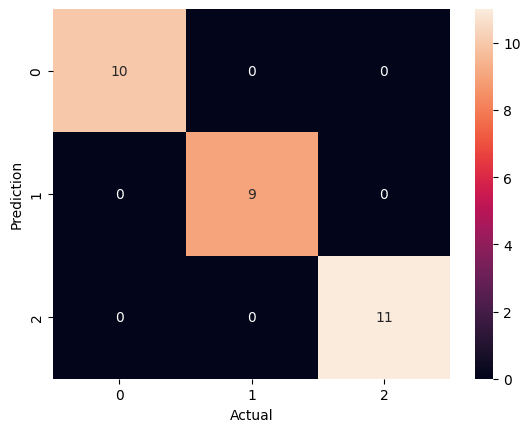

In [23]:
confusiuon_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(confusiuon_matrix, annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

Applying PCA

In [12]:
scaller = StandardScaler() # scalling
x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)
pca = PCA(n_components=2) # Reduce to 2 components
x_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

Naive Bayes with PCA

In [27]:
NB = GaussianNB().fit(x_pca, y_train)
prediction = NB.predict(x_test_pca)
print("Training Accuracy : ", NB.score(x_pca, y_train))
print("Testing Accuracy : ", NB.score(x_test_pca, y_test))
print(classification_report(y_test, prediction))

Training Accuracy :  0.8916666666666667
Testing Accuracy :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix

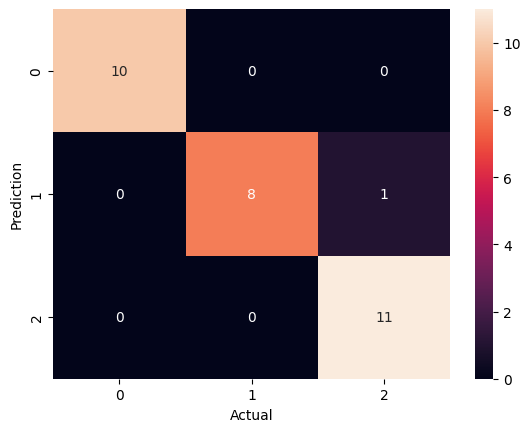

In [28]:
confusiuon_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(confusiuon_matrix, annot=True)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()